# Data Cleaning Practice of NYC Motor Vehicle Collision Data

#### Table Of Contents
* [Introduction](#1)
* [Dataset Exploration](#2)
* [Data Cleaning](#3)
* [Conclusion](#4)

#### Introduction <a class="anchor" id="1"></a>

In this project, we practice data cleaning for the NYC Motor Vehicle Collision Dataset. We will specifically practice the use of list comprehension and tools such as null correlation matrix and heatmaps.

#### Dataset Exploration <a class='anchor' id='2'></a>

In [71]:
#Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mvc = pd.read_csv('D:/DataQuest/nypd_mvc_2018.csv')

In [72]:
mvc.head(5)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [73]:
mvc.isnull().sum()

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

#### Data Cleaning <a class='anchor' id='3'></a>

In [74]:
#Select for columns with 'killed' in column name
killed_col = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_col]
killed.isnull().sum()

pedestrians_killed    0
cyclist_killed        0
motorist_killed       0
total_killed          5
dtype: int64

In [75]:
#Apply sum function across columns for each row
killed_manual_sum = killed.iloc[:,0:3].apply(sum, axis=1)
killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

In [76]:
#Check if our manual sum of types of killed is equal to total killed
killed_mask = killed['total_killed'] != killed_manual_sum
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [77]:
#Replace null values in total_killed with our manually calculated total killed
killed.loc[:,'total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)

In [78]:
#Replace rows with total_killed not equivalent to our manually calculated total killed with null value
killed.loc[:,'total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [79]:
#Select for columns with Injured
injured_bool = [col for col in mvc.columns if 'injured' in col]
injured = mvc[injured_bool]
injured


,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
57859,3,0,0,3.0
57860,0,0,0,0.0
57861,0,0,1,1.0
57862,0,0,0,0.0


In [80]:
#Manually sum different injured types
injured_manual_sum = injured.iloc[:,0:3].apply(sum, axis=1)

In [81]:
#Check for unmatched
injured_mask = injured['total_injured'] != injured_manual_sum
injured[injured_mask]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [82]:
#Replace null values
injured.loc[:,'total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)

In [83]:
#Replace dunmatched with null values
injured.loc[:,'total_injured'] = injured['total_injured'].mask(injured['total_injured']!=injured_manual_sum, np.nan)

In [84]:
#Replace original dataset
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

In [85]:
#Function for heatmap creation
def plot_null_matrix(df, figsize=(18,15)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

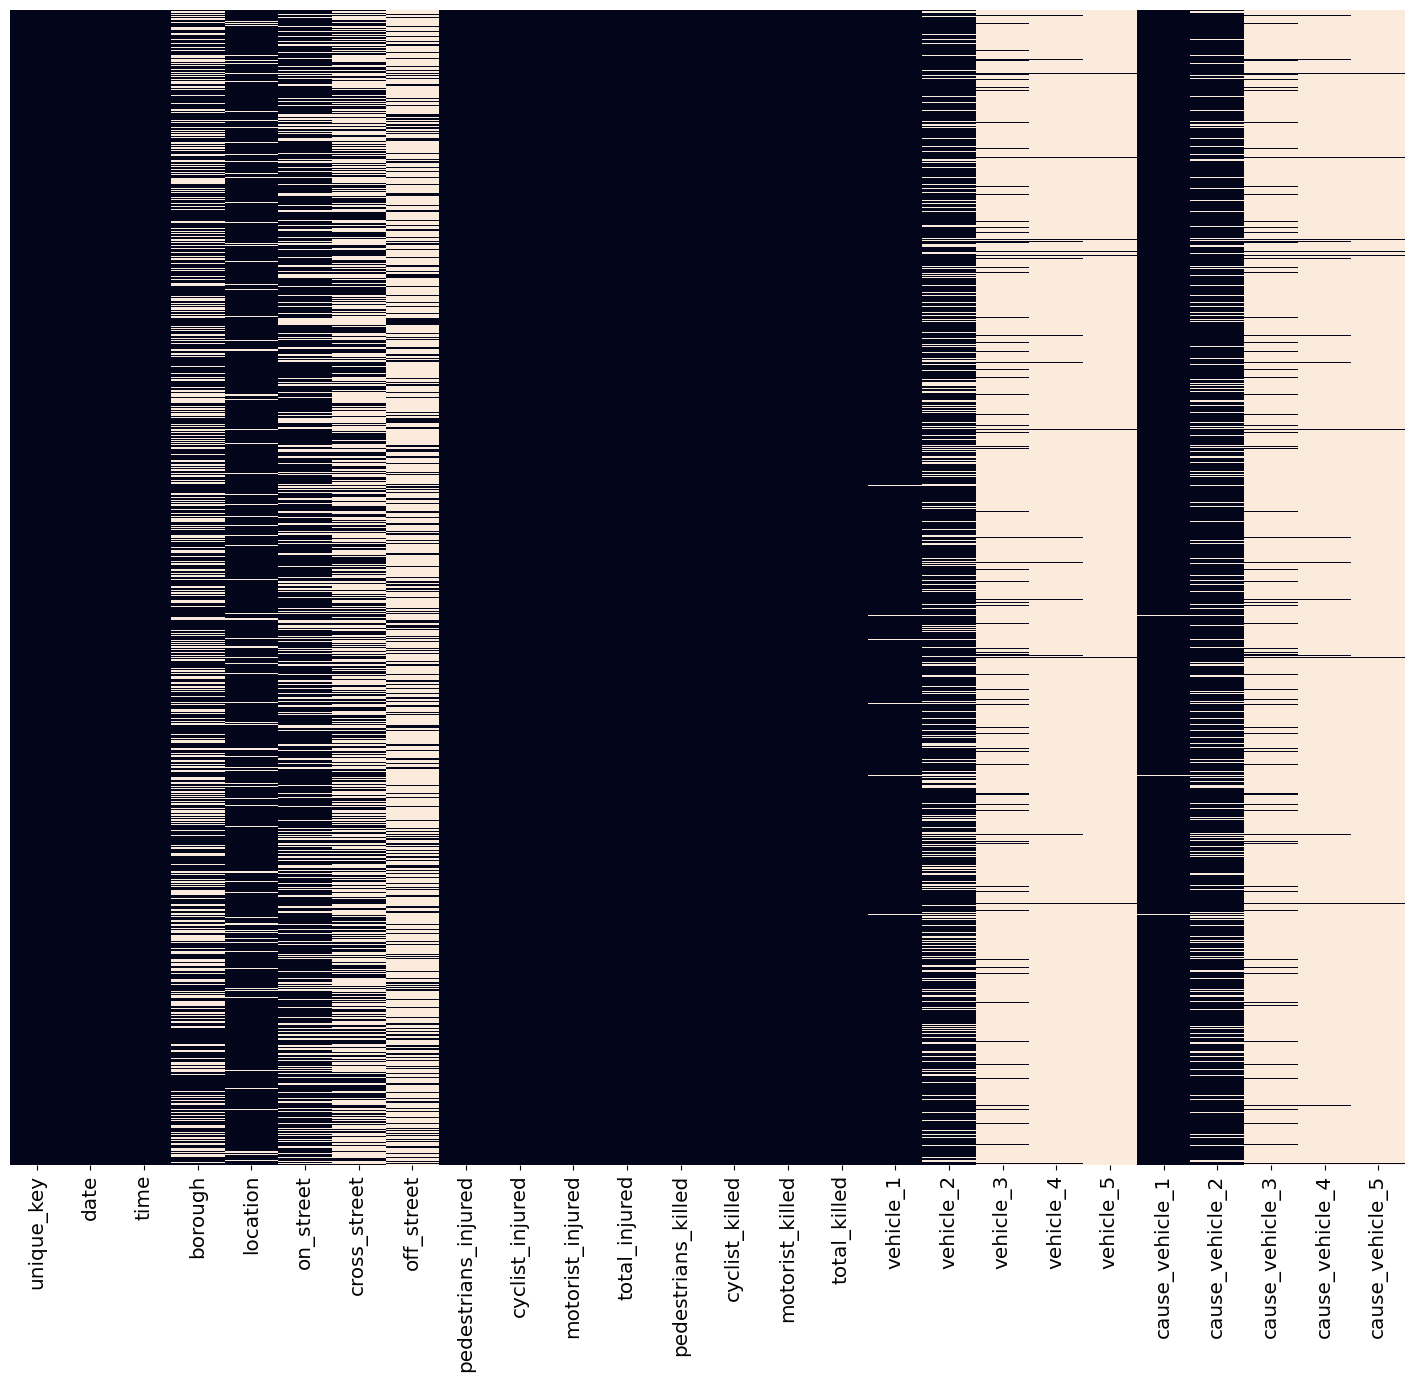

In [86]:
plot_null_matrix(mvc)

We have cleaned the 'injured' and 'killed' columns and there are minimal null values.

In [87]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

In [102]:
#Select for vehicle columns
vehicle_columns = [col for col in mvc.columns if 'vehicle' in col]
vehicles = mvc[vehicle_columns]

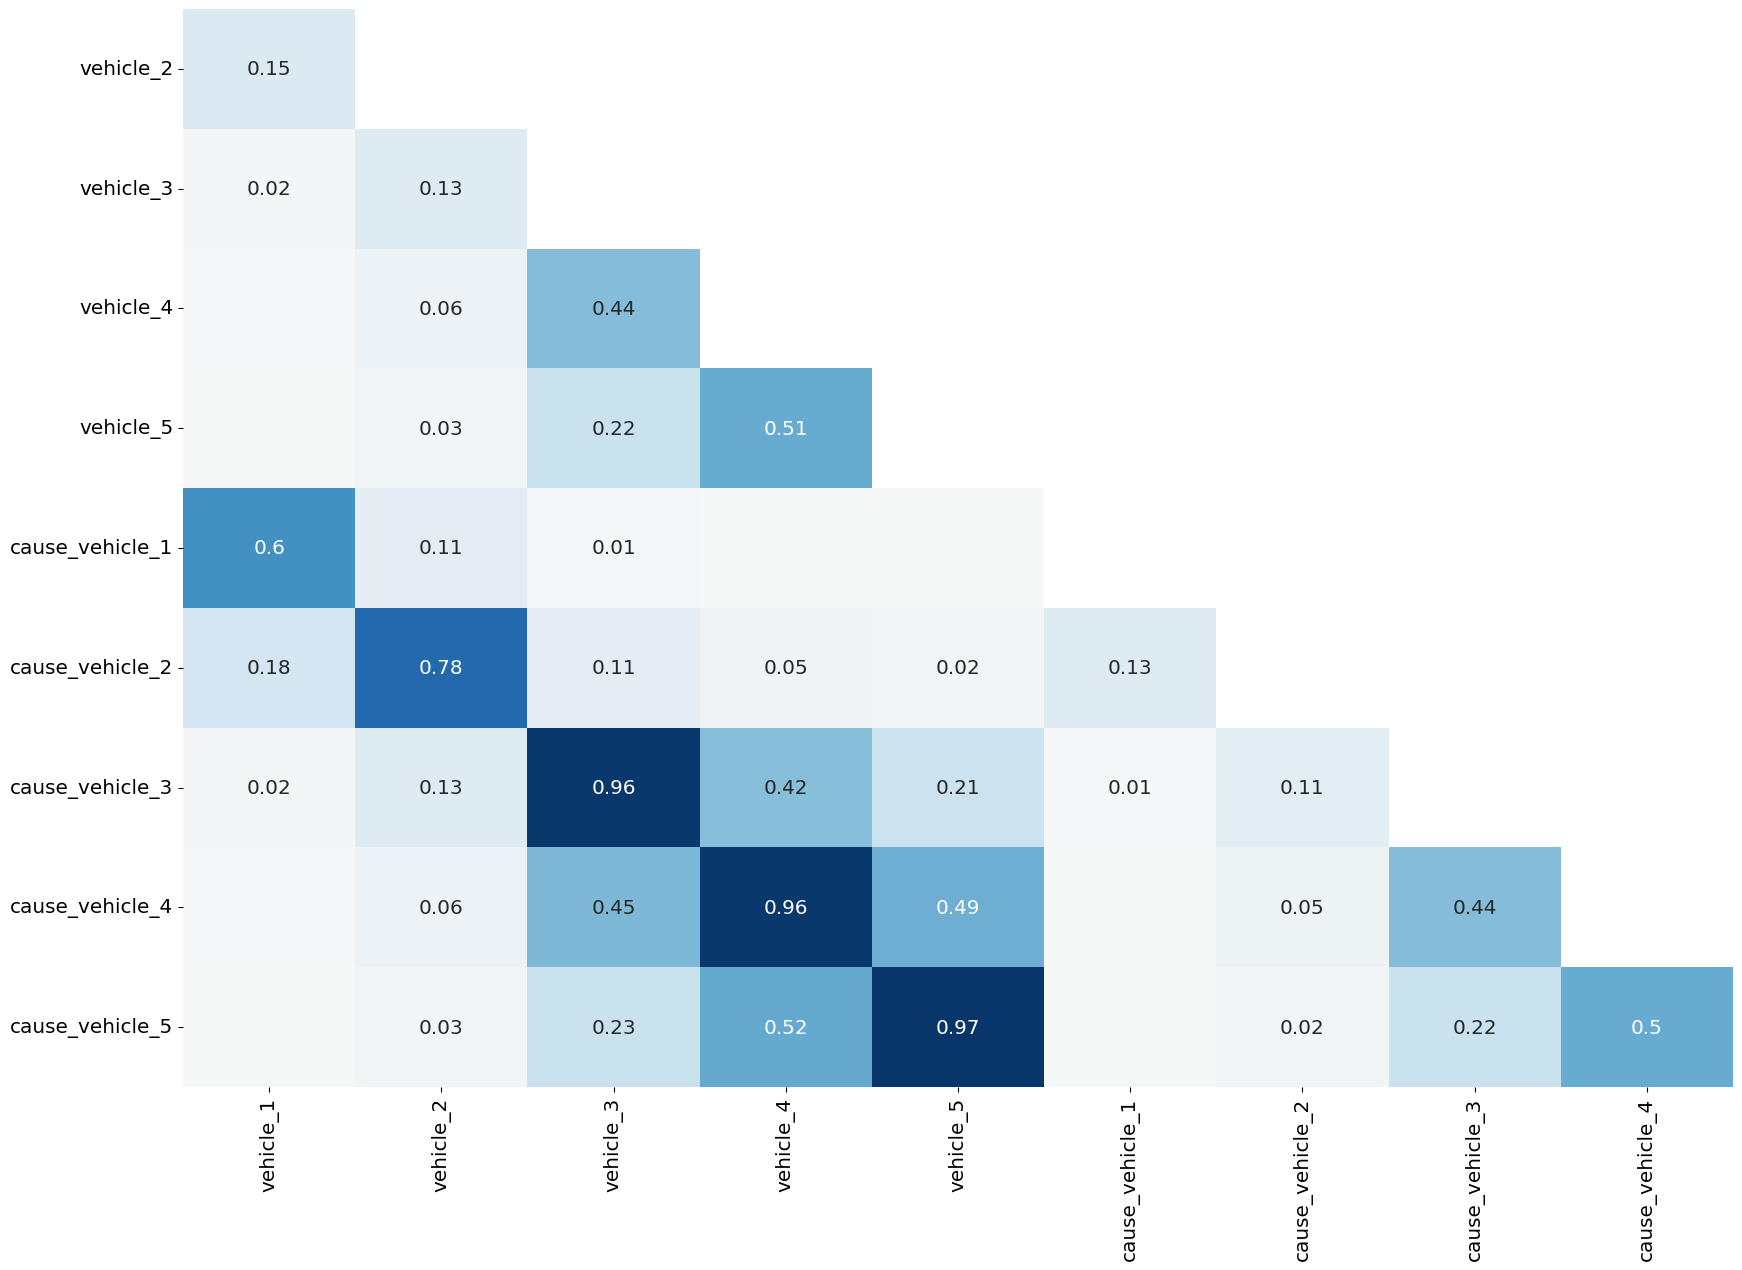

In [101]:
plot_null_correlations(vehicles)

The null correlation heatmap helps us identify which columns have high correlation in terms of co-occurrences of missing data.

In [90]:
#Build list to help us see correlation between missing vehicles and missing causes

col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [91]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicle = pd.DataFrame(mvc[v_cols])
top10_vehicles = vehicle.stack().value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
Name: count, dtype: int64

In [92]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()



In [93]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    
    #Replace missing data with "Unspecified"
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")
    
summary_after = summarize_missing()

In [94]:
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [95]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


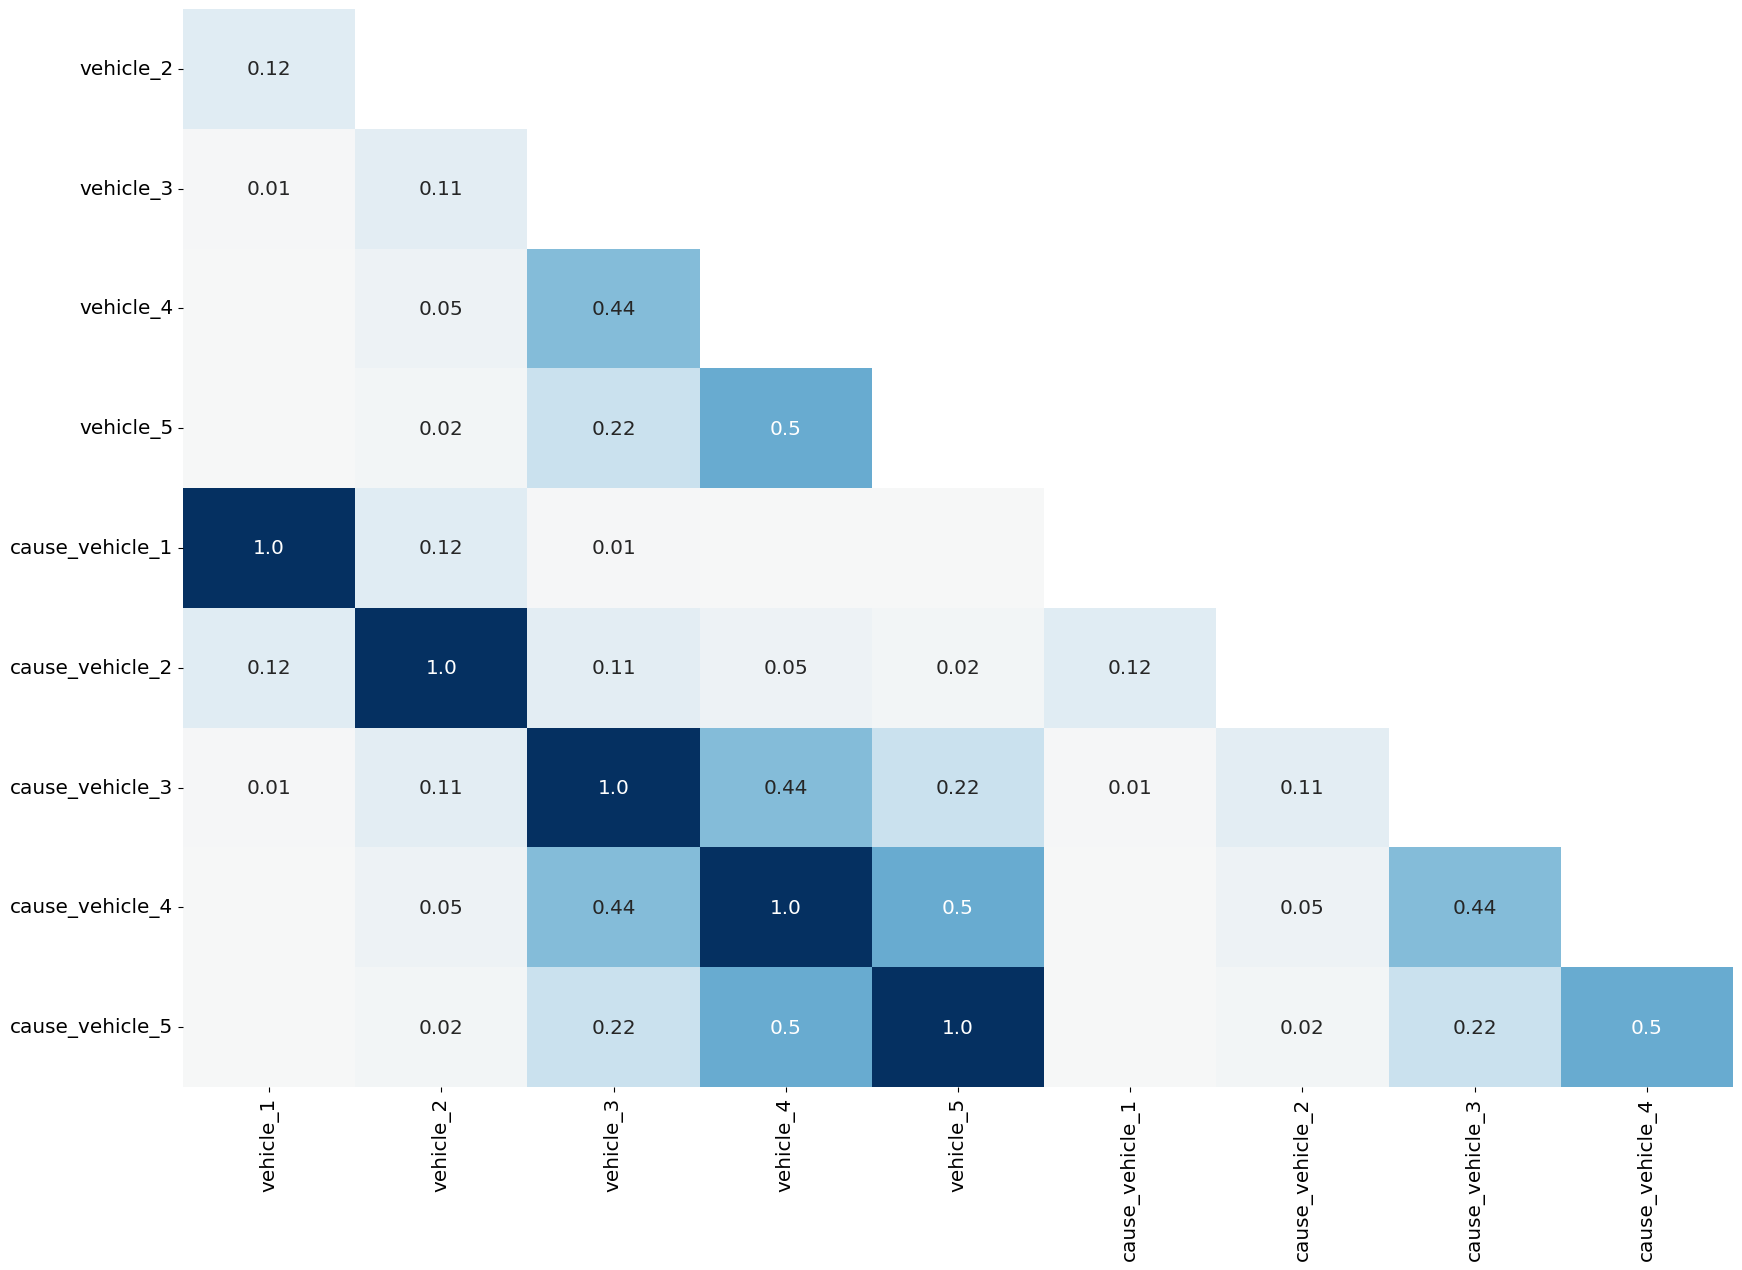

In [96]:
#Check null correlation heatmap again
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

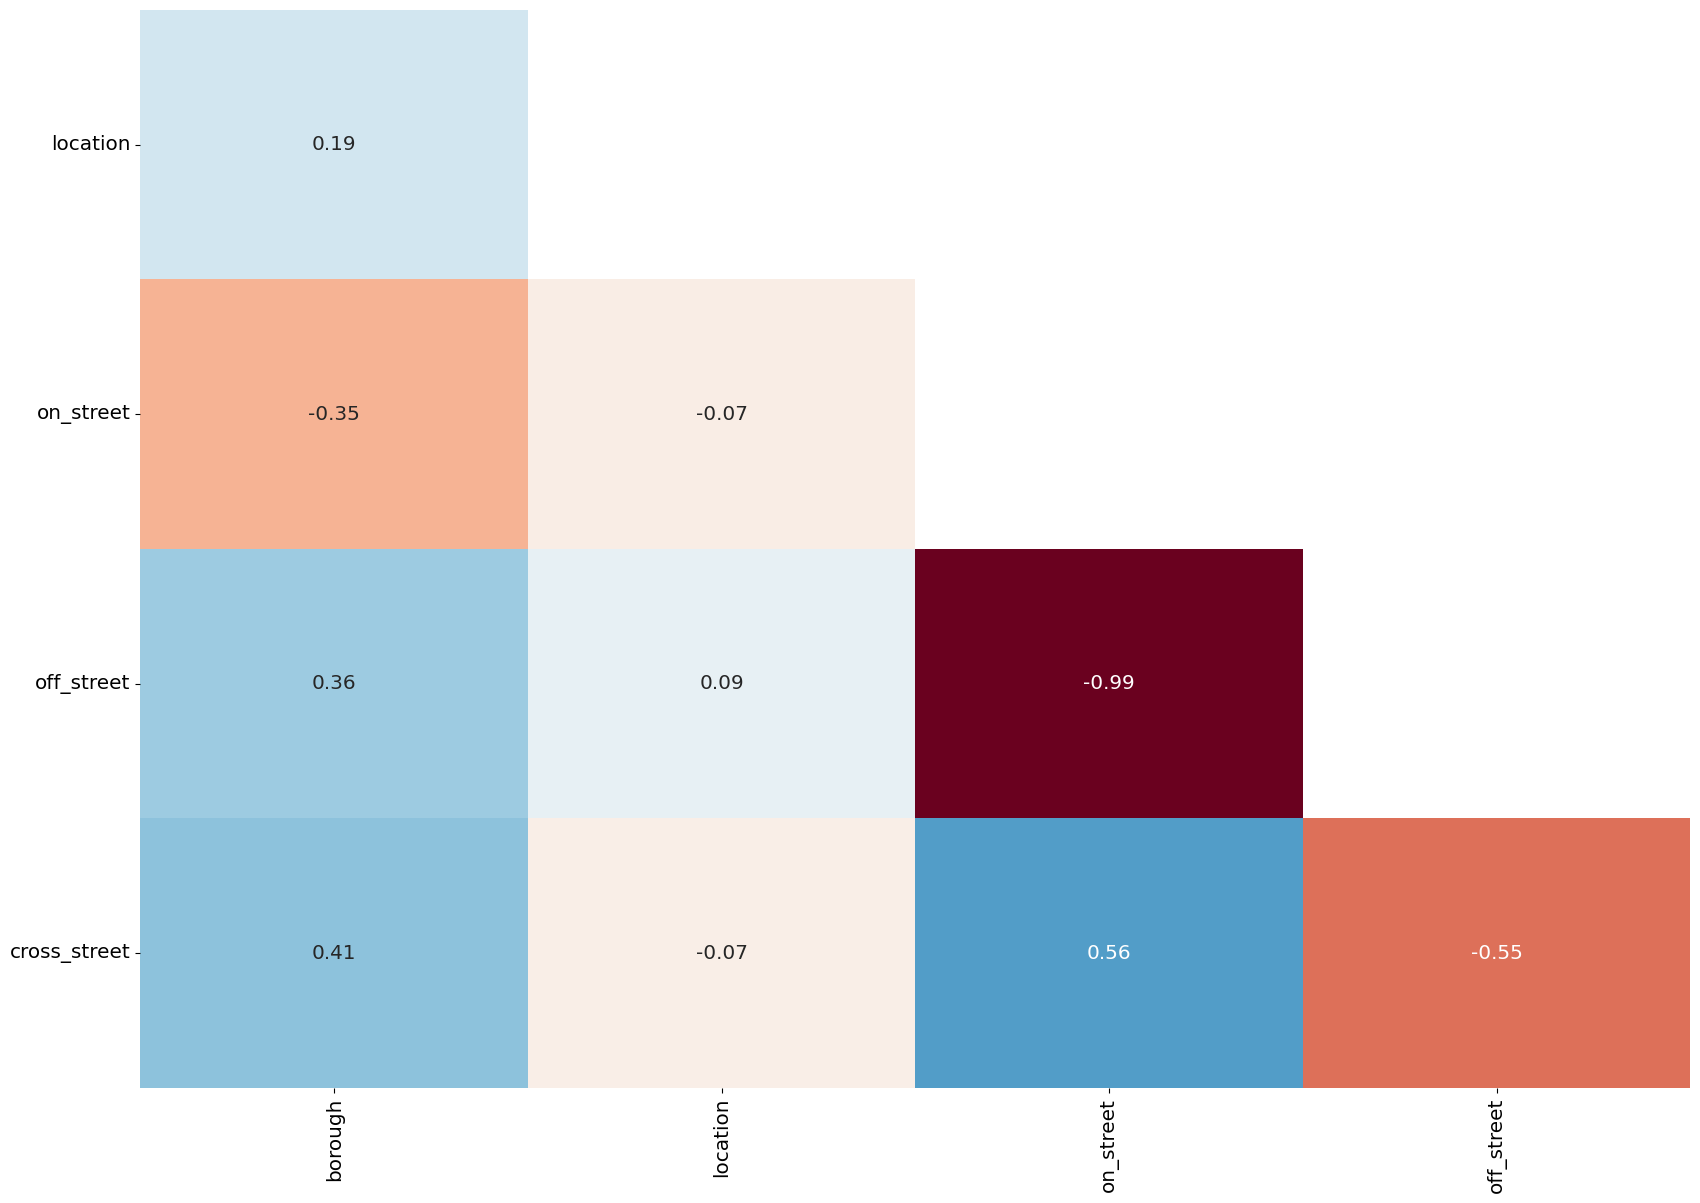

In [97]:
#Check null correlation for other location data
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
plot_null_correlations(location_data)

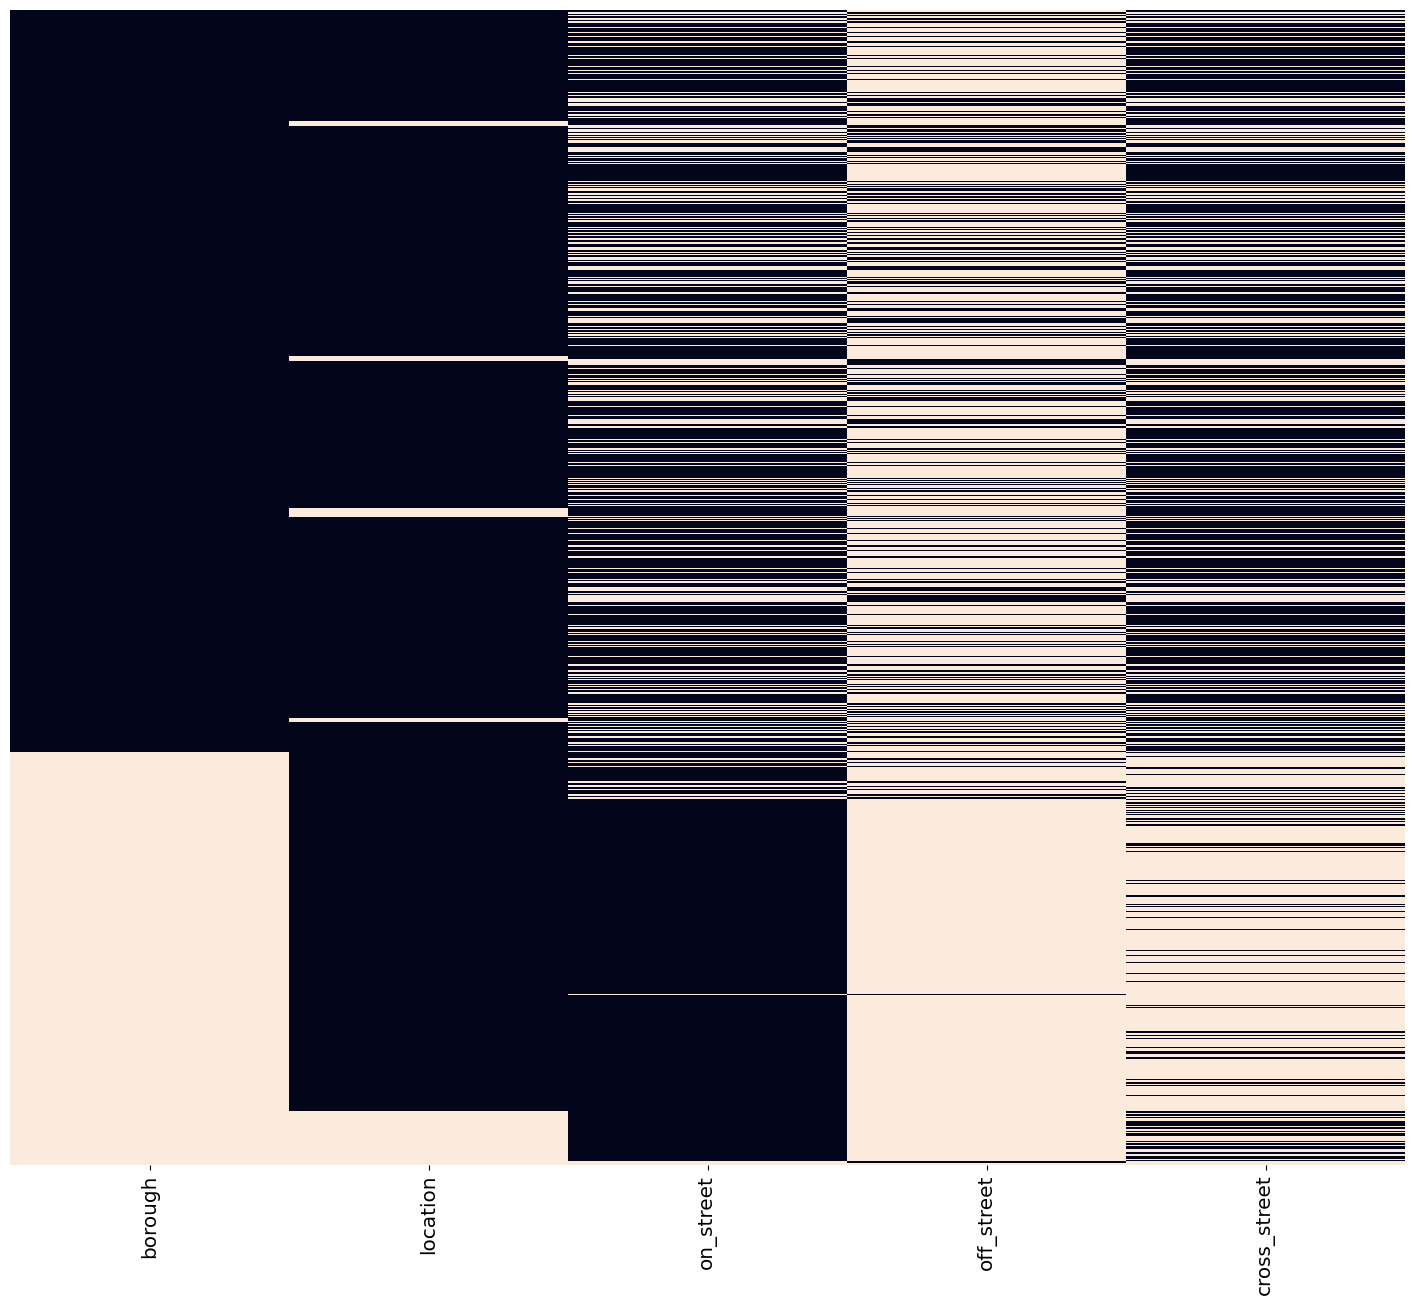

In [98]:
#Check null values heatmap
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

#### Conclusion <a class='anchor' id='4'></a>

In this project, we practiced a few techniques and tools used in data cleaning.

- We utilized list comprehension and boolean masks to select for specific columns in the dataframes.
- We generated heatmaps for overview of null values.
- We created null correlation matrix to help us visualize co-occurrences of missing values.

The data cleaning process is generally a long and potentially difficult process but proper cleaning goes a long way to simplify the data analysis that follows.